In [1]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binned_statistic
from tqdm import tqdm
import astropy.units as u
from astropy.coordinates import SkyCoord, search_around_sky

import matplotlib
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=21), plt.rc('ytick', labelsize=21)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [2]:
def percentile_16(arr):
    return np.percentile(arr,16)

def percentile_84(arr):
    return np.percentile(arr,84)

#### magnitude distribution

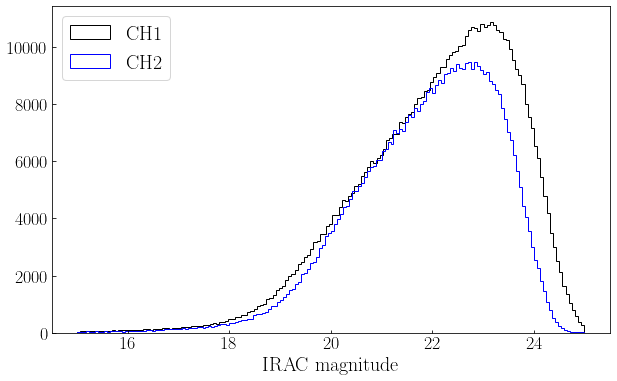

In [42]:
fig, axs = plt.subplots(1, 1, figsize = (10,6),sharex=True, sharey=True)
colors = ['k','b']
for i in [0,1]:
    cat = Table.read('/Volumes/LejaySSD/COSMOS_deep_CLAUDS_v9_CH'+str(i+1)+'_matchedfrac.fits')
    plt.hist(cat['MAG_AUTO_CH'+str(i+1)],histtype='step',range=(15,25),bins='scott',color=colors[i],label='CH'+str(i+1))
    
plt.xlabel('IRAC magnitude',fontsize=20)
plt.legend(fontsize=20,loc='upper left')

#### add CLAUDS inside_u and mask flag to SHIRAZ objects
refine matched fraction estimate

In [3]:
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion, PixCoord, CirclePixelRegion
from astropy.io import fits
from astropy import wcs

In [72]:
sky_center = SkyCoord(149, 2, unit='deg')
sky_radius = Angle(25, 'deg')
sky_region = CircleSkyRegion(sky_center, sky_radius)

In [75]:
skycoord = SkyCoord(149, 2, unit='deg')
skycoord.to_pixel(w)

(array(23402.346), array(-4356.771))

#### matched fraction

In [4]:
cat = Table.read('/Volumes/LejaySSD/COSMOS_deep_CLAUDS_v9_CH1_matchedfrac.fits')

[0.9305555555555556, 0.9419295839048926, 0.9444834362717575, 0.954419147694104, 0.9492435630121708, 0.9343505303721232, 0.9148080507361495, 0.8786417132934594, 0.7907986111111112, 0.532608695652174]
[0.9373750832778148, 0.9527649769585254, 0.9430611850994016, 0.9490231001727115, 0.9424895457137427, 0.9156372377344073, 0.8718287016179896, 0.7732332202078461, 0.5800850768295859, 0.4]


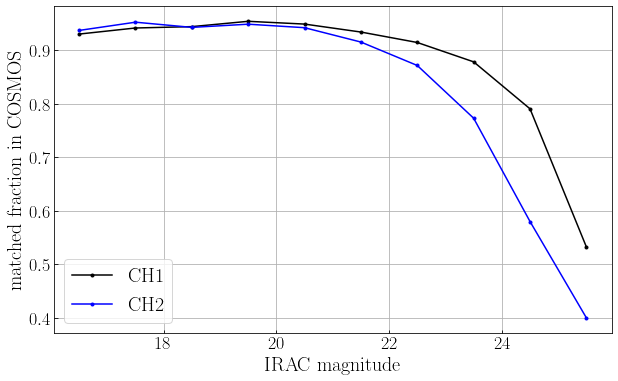

In [80]:
fig, axs = plt.subplots(1, 1, figsize = (10,6),sharex=True, sharey=True)
colors = ['k','b']
for i in [0,1]:
    cat = Table.read('/Volumes/LejaySSD/COSMOS_deep_CLAUDS_v9_CH'+str(i+1)+'_matchedfrac.fits')
    cat = cat[cat['MAG_AUTO_CH'+str(i+1)]>-90]

    matched_frac = []
    for mag in np.linspace(16,25,10):
        cat_magbin = cat[cat['MAG_AUTO_CH'+str(i+1)]>mag]
        cat_magbin = cat_magbin[cat_magbin['MAG_AUTO_CH'+str(i+1)]<mag+1]
    
        cat_matched = cat_magbin[cat_magbin['i']>0]
        matched_frac.append(len(cat_matched)/len(cat_magbin))
    
    plt.plot(np.linspace(16,25,10)+0.5,matched_frac,'.-'+colors[i],label='CH'+str(i+1))
    print(matched_frac)

plt.xlabel('IRAC magnitude',fontsize=20)
plt.ylabel('matched fraction in COSMOS',fontsize=20)
plt.legend(fontsize=20)
plt.grid()

[0.973621103117506, 0.9745087626128518, 0.9687700534759358, 0.9716264521894549, 0.9620141907440553, 0.9440188755105063, 0.9244492242483671, 0.8904677088468694, 0.8001333333333334, 0.5581395348837209]
[0.974169741697417, 0.9640861931364725, 0.9606715373853567, 0.9661227252218378, 0.9569625850877331, 0.9290336003328825, 0.8852527985613291, 0.7857011100139972, 0.5882655687081833, 0.4166666666666667]


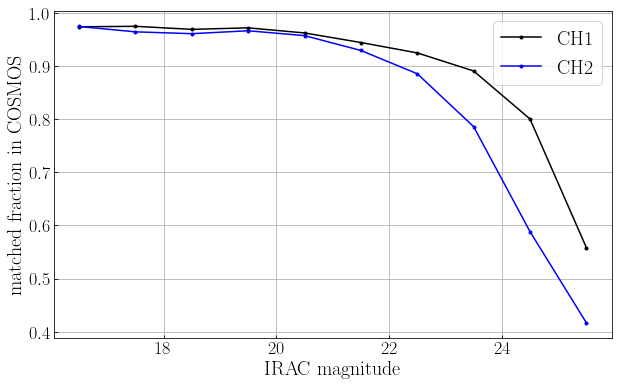

In [81]:
fig, axs = plt.subplots(1, 1, figsize = (10,6),sharex=True, sharey=True)
colors = ['k','b']
for i in [0,1]:
    cat = Table.read('/Volumes/LejaySSD/COSMOS_deep_CLAUDS_v9_CH'+str(i+1)+'_matchedfrac2.fits')
    cat = cat[cat['MAG_AUTO_CH'+str(i+1)]>-90]

    matched_frac = []
    for mag in np.linspace(16,25,10):
        cat_magbin = cat[cat['MAG_AUTO_CH'+str(i+1)]>mag]
        cat_magbin = cat_magbin[cat_magbin['MAG_AUTO_CH'+str(i+1)]<mag+1]
    
        cat_matched = cat_magbin[cat_magbin['i']>0]
        matched_frac.append(len(cat_matched)/len(cat_magbin))
    
    plt.plot(np.linspace(16,25,10)+0.5,matched_frac,'.-'+colors[i],label='CH'+str(i+1))
    print(matched_frac)
    
plt.xlabel('IRAC magnitude',fontsize=20)
plt.ylabel('matched fraction in COSMOS',fontsize=20)
plt.legend(fontsize=20)
plt.grid()

#### ra/dec skyplot

In [7]:
cat_v9 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params_sfq_added.fits')

In [8]:
cat = Table.read('/Volumes/LejaySSD/COSMOS_deep_CLAUDS_v9_CH1_CH2_trim_trim.fits')
cat = cat[cat['inside_u'] == True]
cat = cat[cat['MASK'] == 0]  # unmasked
cat_gal = cat[cat['OBJ_TYPE'] == 0]  # galaxies

cat_ch1 = cat[cat['MAG_AUTO_CH1']>-90]
cat_ch2 = cat[cat['MAG_AUTO_CH2']>-90]

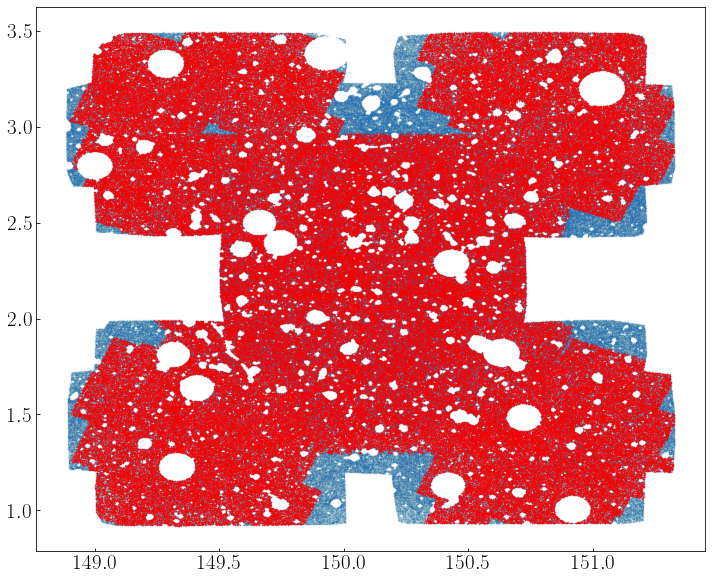

In [9]:
fig = plt.figure(figsize=(12,10))

plt.scatter(cat_gal['RA'],cat_gal['DEC'],s=0.1,alpha=0.1)
plt.scatter(cat_ch2['RA'],cat_ch2['DEC'],s=0.1,alpha=0.8,color='r')
plt.show()

In [10]:
cat = cat[cat['i']<26]

cat = cat[cat['i']>0]
cat = cat[cat['HSC_i_MAG_AUTO']>0]
cat = cat[cat['MAG_AUTO_CH1']>0]
cat = cat[cat['MAG_AUTO_CH2']>0]
cat = cat[cat['IRAC_CH1_MAG']>0]
cat = cat[cat['IRAC_CH2_MAG']>0]

cat = cat[cat['i']<90]
cat = cat[cat['HSC_i_MAG_AUTO']<90]
cat = cat[cat['MAG_AUTO_CH1']<90]
cat = cat[cat['IRAC_CH1_MAG']<90]
cat = cat[cat['MAG_AUTO_CH2']<90]
cat = cat[cat['IRAC_CH2_MAG']<90]
print(len(cat))

188232


In [11]:
# select only isolated galaxies (5 arcsec separation, 1mag difference)
# avoid source confusion

print(len(cat))

coords = SkyCoord(np.array(cat['RA']) * u.deg, np.array(cat['DEC']) * u.deg)
arr = search_around_sky(coords, coords, 10 / 3600 * u.deg)
sep2d, b = np.unique(np.round(arr[2], 10), return_index=True)  # only keep the unique pairs
arr0 = arr[0][b]
arr1 = arr[1][b]
gal1_list = arr0[sep2d.value > 0.01 / 3600]
gal2_list = arr1[sep2d.value > 0.01 / 3600]

remove_ids = []
for i in range(len(gal1_list)):
    if abs(cat[gal1_list[i]]['HSC_i_MAG_AUTO'] - cat[gal2_list[i]]['HSC_i_MAG_AUTO'])<1:
        remove_ids.append(gal1_list[i])
        remove_ids.append(gal2_list[i])
print(len(remove_ids))
cat.remove_rows(remove_ids)
print(len(cat))

188232
133144
96238


#### check $i-CH1$ and $i-CH2$ colors with COSMOS2020

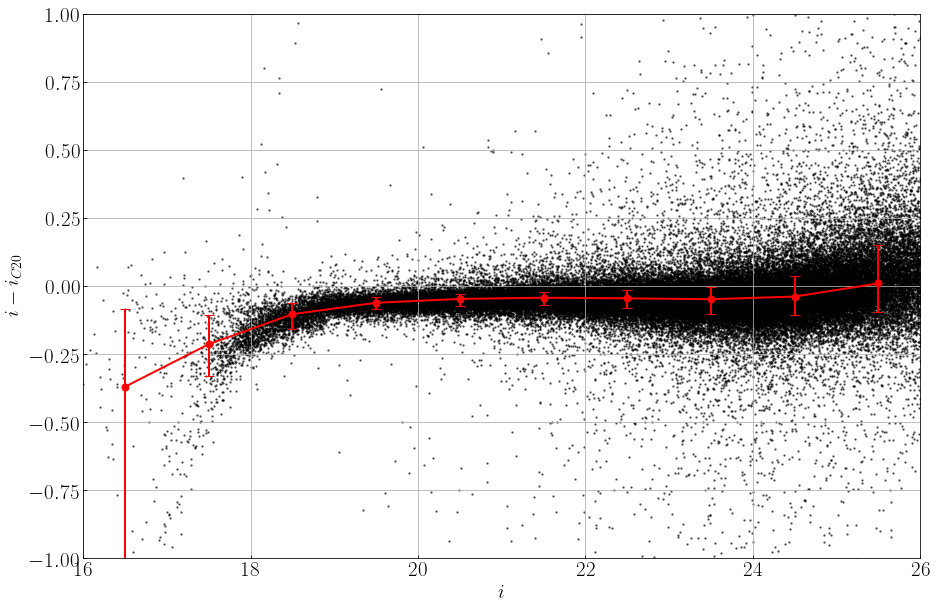

In [13]:
color_diff =  cat['i']-cat['HSC_i_MAG_AUTO']
medians_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
per16_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic=percentile_16, bins=np.arange(16,27,1))
per84_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic=percentile_84, bins=np.arange(16,27,1))

fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.5)
plt.errorbar(bin_edges[:-1]+0.5,medians_ch1,yerr=[medians_ch1-per16_ch1,per84_ch1-medians_ch1],fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$i-i_{C20}$',fontsize=20)
plt.xlim([16,26])
plt.ylim([-1,1])
plt.grid()
plt.show()

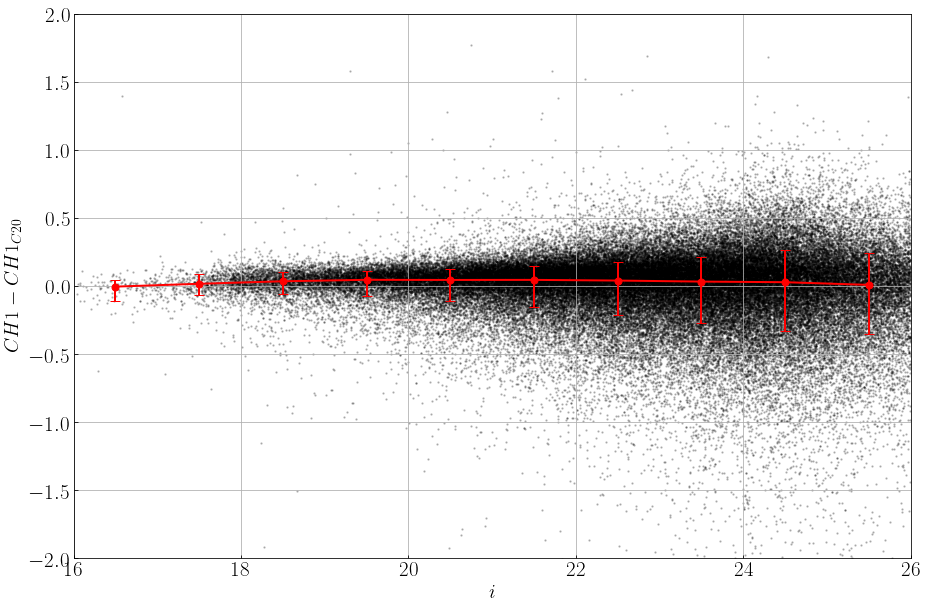

In [14]:
color_diff =  cat['MAG_AUTO_CH1']-cat['IRAC_CH1_MAG']
medians_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
per16_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic=percentile_16, bins=np.arange(16,27,1))
per84_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic=percentile_84, bins=np.arange(16,27,1))

fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.2)
plt.errorbar(bin_edges[:-1]+0.5,medians_ch1,yerr=[medians_ch1-per16_ch1,per84_ch1-medians_ch1],fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$CH1-CH1_{C20}$',fontsize=20)
plt.xlim([16,26])
plt.ylim([-2,2])
plt.grid()
plt.show()

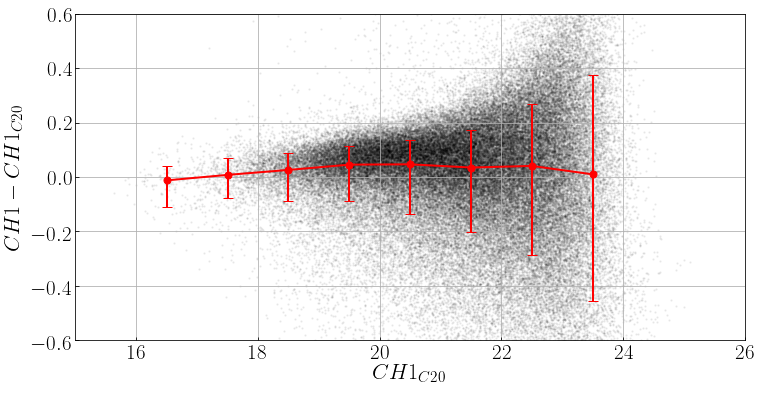

In [12]:
color_diff =  cat['MAG_AUTO_CH1']-cat['IRAC_CH1_MAG']
ch1_medians_ch1,ch1_bin_edgesch1_,bin_numbers = binned_statistic(cat['IRAC_CH1_MAG'], color_diff, statistic='median', bins=np.arange(16,24.5,1))
ch1_per16_ch1,ch1_bin_edges,ch1_bin_numbers = binned_statistic(cat['IRAC_CH1_MAG'], color_diff, statistic=percentile_16, bins=np.arange(16,24.5,1))
ch1_per84_ch1,ch1_bin_edges,ch1_bin_numbers = binned_statistic(cat['IRAC_CH1_MAG'], color_diff, statistic=percentile_84, bins=np.arange(16,24.5,1))

fig = plt.figure(figsize=(12,6))
plt.scatter(cat['IRAC_CH1_MAG'], color_diff,color='k',s=2, alpha=0.05)
plt.errorbar(ch1_bin_edges[:-1]+0.5, ch1_medians_ch1,yerr=[ch1_medians_ch1-ch1_per16_ch1,ch1_per84_ch1-ch1_medians_ch1],fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$CH1_{C20}$',fontsize=22)
plt.ylabel('$CH1-CH1_{C20}$',fontsize=22)
plt.xlim([15,26])
plt.ylim([-0.6,0.6])
plt.grid()
plt.show()

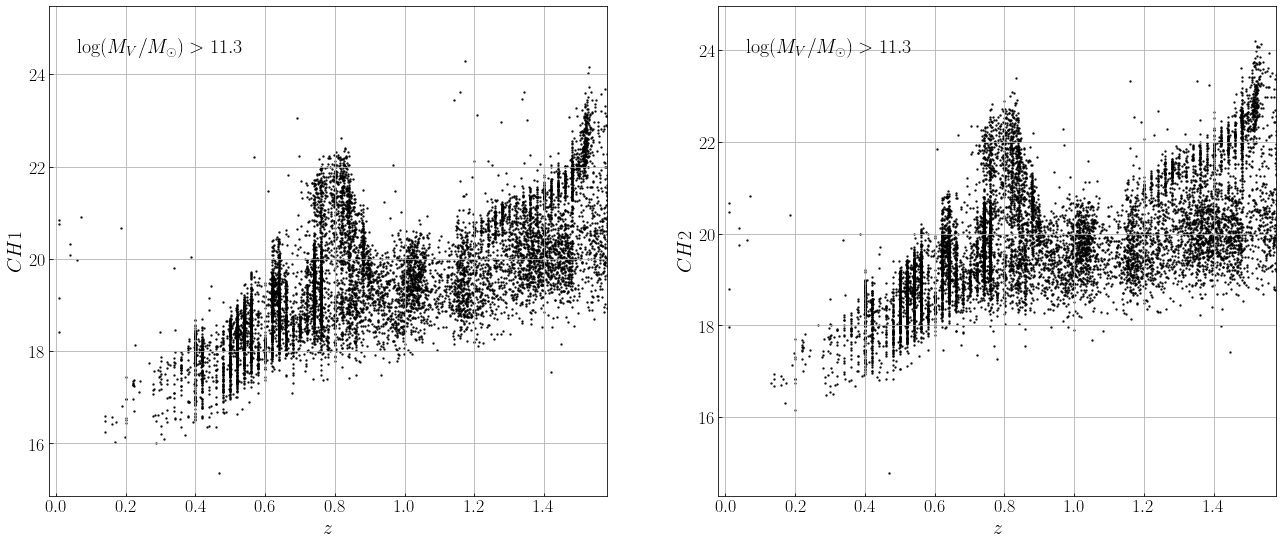

In [8]:
cat_massive = cat[cat['MASS_MED']>11.3]
fig, axs = plt.subplots(1, 2, figsize = (22, 9))

axs[0].scatter(cat_massive['ZPHOT'], cat_massive['MAG_AUTO_CH1'],color='k',s=2, alpha=0.8)
axs[1].scatter(cat_massive['ZPHOT'], cat_massive['MAG_AUTO_CH2'],color='k',s=2, alpha=0.8)

axs[0].set_xlabel('$z$',fontsize=20)
axs[1].set_xlabel('$z$',fontsize=20)
axs[0].set_xlim([-0.02,1.58])
axs[1].set_xlim([-0.02,1.58])
axs[0].set_ylabel('$CH1$',fontsize=20)
axs[1].set_ylabel('$CH2$',fontsize=20)

axs[0].annotate('$\log(M_V/M_\odot)>11.3$',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)
axs[1].annotate('$\log(M_V/M_\odot)>11.3$',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)

axs[0].grid()
axs[1].grid()
plt.show()

In [13]:
cat_massive = cat[cat['MASS_MED_C20']>11.3]
cat_massive = cat_massive[cat_massive['ZPHOT']>0]
cat_massive = cat_massive[cat_massive['IRAC_CH1_MAG']>0]
cat_massive = cat_massive[cat_massive['IRAC_CH2_MAG']>0]

fig, axs = plt.subplots(1, 2, figsize = (22, 9))
axs[0].scatter(cat_massive['ZPHOT'], cat_massive['IRAC_CH1_MAG'],color='k',s=2, alpha=0.8)
axs[1].scatter(cat_massive['ZPHOT'], cat_massive['IRAC_CH2_MAG'],color='k',s=2, alpha=0.8)

axs[0].set_xlabel('$z$',fontsize=20)
axs[1].set_xlabel('$z$',fontsize=20)
axs[0].set_xlim([-0.02,1.58])
axs[1].set_xlim([-0.02,1.58])
axs[0].set_ylabel('$CH1_{C20}$',fontsize=20)
axs[1].set_ylabel('$CH2_{C20}$',fontsize=20)

axs[0].annotate('$\log(M_{C20}/M_\odot)>11.3$',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)
axs[1].annotate('$\log(M_{C20}/M_\odot)>11.3$',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)

axs[0].grid()
axs[1].grid()
plt.show()

KeyError: 'MASS_MED_C20'

[-0.363 -0.237 -0.146 -0.108 -0.092 -0.087 -0.082 -0.078 -0.056  0.021]
[0.646 0.294 0.321 0.318 0.202 0.232 0.285 0.343 0.42  0.448]


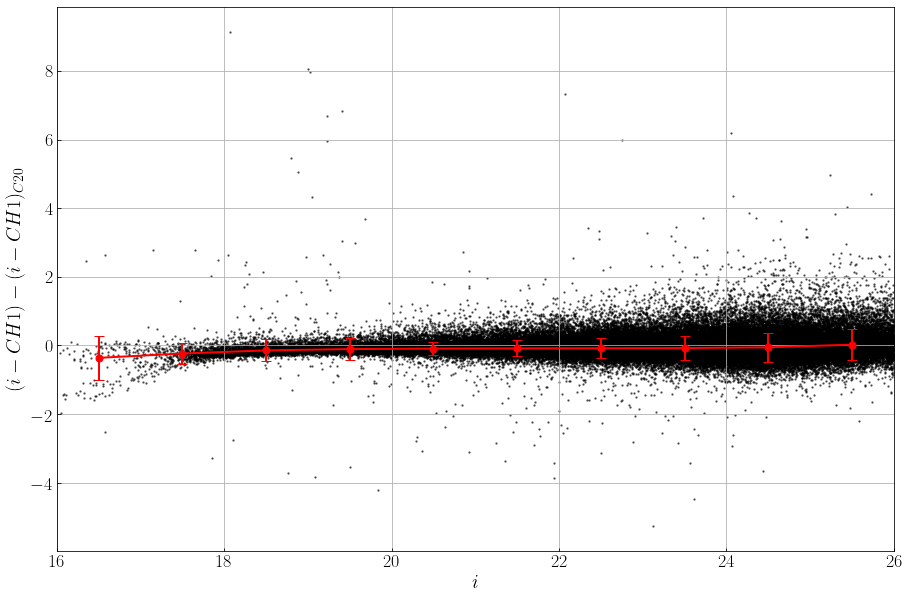

In [14]:
color_diff =  color_diff = (cat['i'] - cat['MAG_AUTO_CH1']) - (cat['HSC_i_MAG_AUTO'] - cat['IRAC_CH1_MAG'])
medians_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
stds_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='std', bins=np.arange(16,27,1))
print(medians_ch1)
print(stds_ch1)
fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.5)
plt.errorbar(bin_edges[:-1]+0.5,medians_ch1,yerr=stds_ch1,fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$(i-CH1)-(i-CH1)_{C20}$',fontsize=20)
plt.xlim([16,26])
# plt.ylim([-3,3])
plt.grid()
plt.show()

[-3.241e-01 -2.371e-01 -1.474e-01 -1.108e-01 -9.527e-02 -8.726e-02
 -8.686e-02 -8.480e-02 -6.885e-02 -1.918e-04]
[1.17  0.47  0.445 0.334 0.298 0.316 0.366 0.42  0.46  0.471]


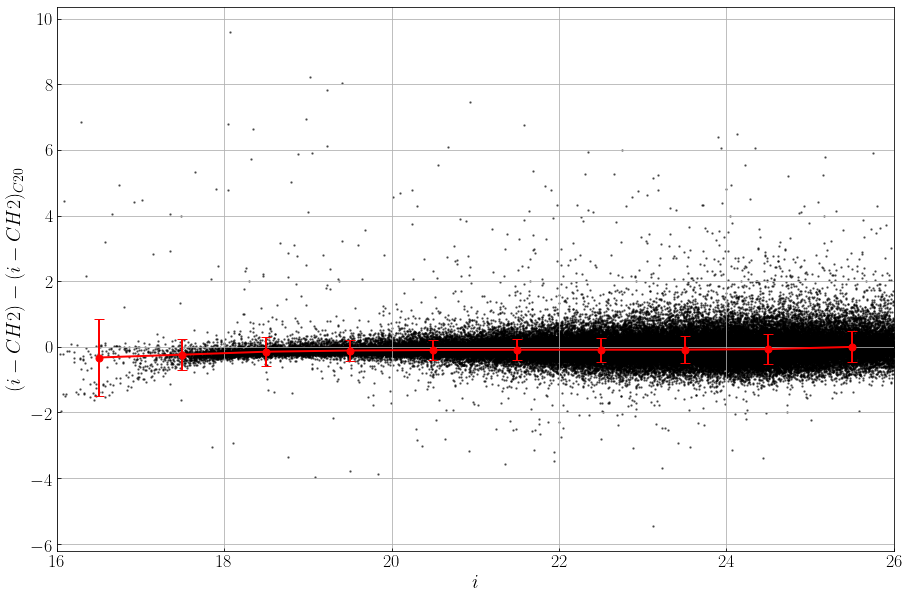

In [15]:
color_diff = (cat['i'] - cat['MAG_AUTO_CH2']) - (cat['HSC_i_MAG_AUTO'] - cat['IRAC_CH2_MAG'])
medians_ch2,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
stds_ch2,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='std', bins=np.arange(16,27,1))
print(medians_ch2)
print(stds_ch2)
fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.5)
plt.errorbar(bin_edges[:-1]+0.5, medians_ch2,yerr=stds_ch2,fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$(i-CH2)-(i-CH2)_{C20}$',fontsize=20)
plt.xlim([16,26])
# plt.ylim([-3,3])
plt.grid()
plt.show()

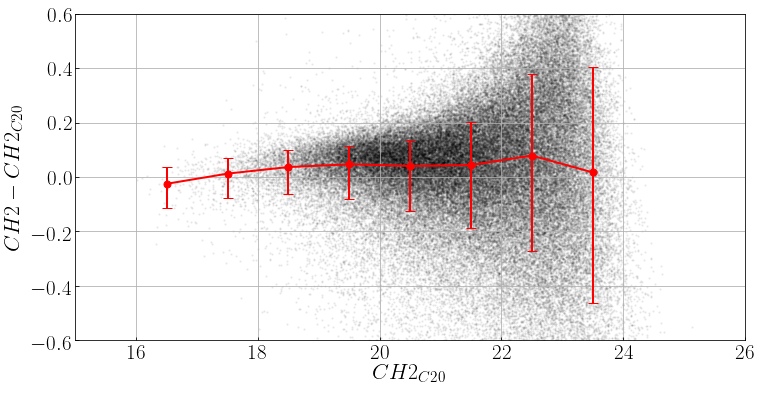

In [15]:
color_diff =  cat['MAG_AUTO_CH2']-cat['IRAC_CH2_MAG']
ch2_medians_ch2,ch2_bin_edges,ch2_bin_numbers = binned_statistic(cat['IRAC_CH2_MAG'], color_diff, statistic='median', bins=np.arange(16,24.5,1))
ch2_per16_ch2,bin_edges,ch2_bin_numbers = binned_statistic(cat['IRAC_CH2_MAG'], color_diff, statistic=percentile_16, bins=np.arange(16,24.5,1))
ch2_per84_ch2,bin_edges,ch2_bin_numbers = binned_statistic(cat['IRAC_CH2_MAG'], color_diff, statistic=percentile_84, bins=np.arange(16,24.5,1))

fig = plt.figure(figsize=(12,6))
plt.scatter(cat['IRAC_CH2_MAG'], color_diff,color='k',s=2, alpha=0.05)
plt.errorbar(ch2_bin_edges[:-1]+0.5,ch2_medians_ch2,yerr=[ch2_medians_ch2-ch2_per16_ch2,ch2_per84_ch2-ch2_medians_ch2],fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$CH2_{C20}$',fontsize=22)
plt.ylabel('$CH2-CH2_{C20}$',fontsize=22)
plt.xlim([15,26])
plt.ylim([-0.6,0.6])
plt.grid()
plt.show()

#### write corrected magnitudes to catalog

In [19]:
cat_type = 'pcat'
for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep']:
    if cat_type == 'v9':
        cat=Table.read('/Volumes/LejaySSD/'+cat_name+'_CLAUDS_v9_CH1_CH2_trim_trim.fits')
    elif cat_type == 'pcat':
        cat=Table.read('/Volumes/LejaySSD/phosphorus_catalogs/p_cats_v211221/'+cat_name+'_pcat211221_mags_gals_CH1_CH2.fits')
    ch1_corr_list=[]
    ch2_corr_list=[]
    ch1_cali_err_list=[]
    ch2_cali_err_list=[]
    ch1_corr_err_list=[]
    ch2_corr_err_list=[]

    non_detect = 0
    for gal in tqdm(cat):
    
        # ch1
        if gal['MAG_AUTO_CH1']>-99:
            ch1_corr = gal['MAG_AUTO_CH1'] - np.interp(gal['MAG_AUTO_CH1'],bin_edges[:-1]+0.5,ch1_medians_ch1)
            ch1_phot_err = gal['MAGERR_AUTO_CH1']
            ch1_calib_err = (np.interp(gal['MAG_AUTO_CH1'],ch1_bin_edges[:-1]+0.5,ch1_per84_ch1) - np.interp(gal['MAG_AUTO_CH1'],ch1_bin_edges[:-1]+0.5,ch1_per16_ch1))/2
            ch1_corr_err = np.sqrt(ch1_phot_err**2 + ch1_calib_err**2)
            
            ch1_corr_list.append(ch1_corr)
            ch1_cali_err_list.append(ch1_calib_err)
            ch1_corr_err_list.append(ch1_corr_err)
        else:
            non_detect += 1
            ch1_corr_list.append(-99)
            ch1_cali_err_list.append(99)
            ch1_corr_err_list.append(99)
        
        # ch2
        if gal['MAG_AUTO_CH2']>-99:
            ch2_corr = gal['MAG_AUTO_CH2'] - np.interp(gal['MAG_AUTO_CH2'],bin_edges[:-1]+0.5,ch2_medians_ch2)
            ch2_phot_err = gal['MAGERR_AUTO_CH2']
            ch2_calib_err = (np.interp(gal['MAG_AUTO_CH2'],ch2_bin_edges[:-1]+0.5,ch2_per84_ch2) - np.interp(gal['MAG_AUTO_CH2'],ch2_bin_edges[:-1]+0.5,ch2_per16_ch2))/2
            ch2_corr_err = np.sqrt(ch2_phot_err**2 + ch2_calib_err**2)
            
            ch2_corr_list.append(ch2_corr)
            ch2_cali_err_list.append(ch2_calib_err)
            ch2_corr_err_list.append(ch2_corr_err)
        else:   
            ch2_corr_list.append(-99)
            ch2_cali_err_list.append(99)
            ch2_corr_err_list.append(99)
    
    print(non_detect)
    print(len(cat))
    
    ch1_corr_col = Column(name='MAG_AUTO_CH1_CORR', data=np.array(ch1_corr_list))
    ch2_corr_col = Column(name='MAG_AUTO_CH2_CORR', data=np.array(ch2_corr_list))
    ch1_cali_err_col = Column(name='MAGERR_AUTO_CH1_CALI', data=np.array(ch1_cali_err_list))
    ch2_cali_err_col = Column(name='MAGERR_AUTO_CH2_CALI', data=np.array(ch2_cali_err_list))
    ch1_corr_err_col = Column(name='MAGERR_AUTO_CH1_CORR', data=np.array(ch1_corr_err_list))
    ch2_corr_err_col = Column(name='MAGERR_AUTO_CH2_CORR', data=np.array(ch2_corr_err_list))
    cat.add_columns([ch1_corr_col,ch2_corr_col,ch1_cali_err_col,ch2_cali_err_col,ch1_corr_err_col,ch2_corr_err_col])
    
    if cat_type == 'v9':
        cat.write('/Volumes/LejaySSD/'+cat_name+'_CLAUDS_v9_CH1_CH2_corr.fits', overwrite=True)
    elif cat_type == 'pcat':
        cat.write('/Volumes/LejaySSD/phosphorus_catalogs/p_cats_v211221/'+cat_name+'_pcat211221_mags_gals_CH1_CH2.fits', overwrite=True)

100%|██████████| 5153248/5153248 [10:38<00:00, 8069.35it/s] 


4683384
5153248


100%|██████████| 3555124/3555124 [01:16<00:00, 46215.80it/s] 


2978353
3555124


100%|██████████| 3336219/3336219 [07:13<00:00, 7689.71it/s] 


2997441
3336219


#### CH1 and CH2 matched rate

In [ ]:
np.random.randint(10)

In [43]:
import astropy.units as u
from astropy.coordinates import SkyCoord, search_around_sky

17 3143 3214
18 6009 6247
19 10268 10569
20 17991 18807
21 35333 38167
22 67836 77364
23 116607 150142
24 157487 263730
25 106860 357033
26 36435 409895


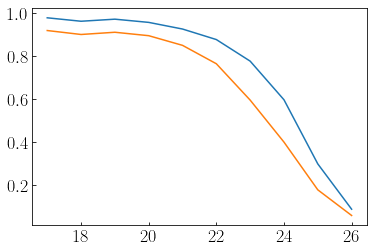

In [78]:
cat = Table.read('/Volumes/LejaySSD/COSMOS_deep_CLAUDS_v9_CH1_CH2_trim.fits')
cat_ch1 = cat[cat['MAG_AUTO_CH1']>-90]
cat_ch2 = cat[cat['MAG_AUTO_CH2']>-90]
coord_ch1 = SkyCoord(SkyCoord(cat_ch1['RA'] * u.deg, cat_ch1['DEC'] * u.deg))
coord_ch2 = SkyCoord(SkyCoord(cat_ch2['RA'] * u.deg, cat_ch2['DEC'] * u.deg))
coord_all = SkyCoord(SkyCoord(cat['RA'] * u.deg, cat['DEC'] * u.deg))

# keep only the objects within 10" from IRAC objects
arr = search_around_sky(coord_all, coord_ch1, 5.0/3600 * u.deg)
arr0 = np.unique(arr[0])
cat = cat[arr0]

ch1_matched_frac = []
ch2_matched_frac = []
for i in range(17,27,1):
    cat_mag = cat[abs(cat['i']-i)<0.5]
    cat_mag_ch1 = cat_mag[cat_mag['MAG_AUTO_CH1']>-90]
    cat_mag_ch2 = cat_mag[cat_mag['MAG_AUTO_CH2']>-90]
    ch1_matched_frac.append(len(cat_mag_ch1)/len(cat_mag))
    ch2_matched_frac.append(len(cat_mag_ch2)/len(cat_mag))
    print(i,len(cat_mag_ch1),len(cat_mag))

plt.plot(np.arange(17,27,1),ch1_matched_frac)
plt.plot(np.arange(17,27,1),ch2_matched_frac)

#### use 3" magnitude

MAG_APER_1 is 3"